# Exploratory data analysis

Before building our model, we're first going to understand the nature of our dataset. We'll search for multicollinearity and plot the distribution of each of the features in the dataset. Crucially, multicollinearity -- when one independent variable can be written as a linear combination of the other variables -- will make it more difficult to identify the impact of each individual variable on the spread of COVID-19. However, in this particicular study, it may be unavoidable since human behavior and socioeconomic circumstances are often correlated. 

In [ ]:
%load_ext autoreload 
%autoreload 2
%cd ../

In [26]:
# code for creating feature heatmap and distribution plots

import sys 
sys.path.append('../src')

import pandas as pd

from src.data.make_dataset import CountiesDataset

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams['figure.figsize'] = 6,5

In [4]:
counties = CountiesDataset(load = True)
counties.dataset.head(2)

,telework_score,percent_freq_or_always_mask_use,percent_republican_2016_pres,population_total,percent_uninsured,percent_below_poverty_line,percent_households_more_people_than_rooms,percent_racial_minority,percent_without_high_school_diploma,percent_over_65,...,median_non_home_dwell_time_percent_increase_jan_to_april,median_percentage_time_home_percent_increase_jan_to_april,percentage_completely_home_percent_increase_jan_to_april,start_date,end_date,num_days,starting_cases_100k,ending_cases_100k,net_cases,avg_new_cases
6001,0.412083,0.918,0.146610,1643700,5.1,10.6,7.7,68.2,12.0,13.1,...,-8150.757576,19.965952,45.807196,2020-04-19,2021-01-30,286,71.53,4440.19,4368.66,15.275035
6003,0.318770,0.802,0.360465,1146,10.3,19.8,2.3,40.8,11.1,25.6,...,-808.651399,36.285409,56.865238,2020-07-05,2021-01-30,209,96.25,6929.74,6833.49,32.696124


First, we'll examine which features are coerrelated with one another. Ideally, all of our features would be truly independent (r = 0), but that's highly unlikely given our focus on socioeconomic and behavioral variables. In the chart below, r = 1 indicates a perfect positive coerrelation and r = -1 indicates a perfect negative correlation. Since we're interested in multicollinearity we'll remove the variables related to caseload for now.

In [51]:
feature_names = [
    'start_date',
    'telework_score',
    'percent_freq_or_always_mask_use',
    'percent_republican_2016_pres',
    'percent_uninsured',
    'percent_below_poverty_line',
    'percent_households_more_people_than_rooms',
    'percent_racial_minority',
    'percent_without_high_school_diploma',
    'percent_over_65',
    'population_density',
    'median_non_home_dwell_time_percent_increase_jan_to_april'
]
features = counties.dataset[feature_names]
features = features.dropna()

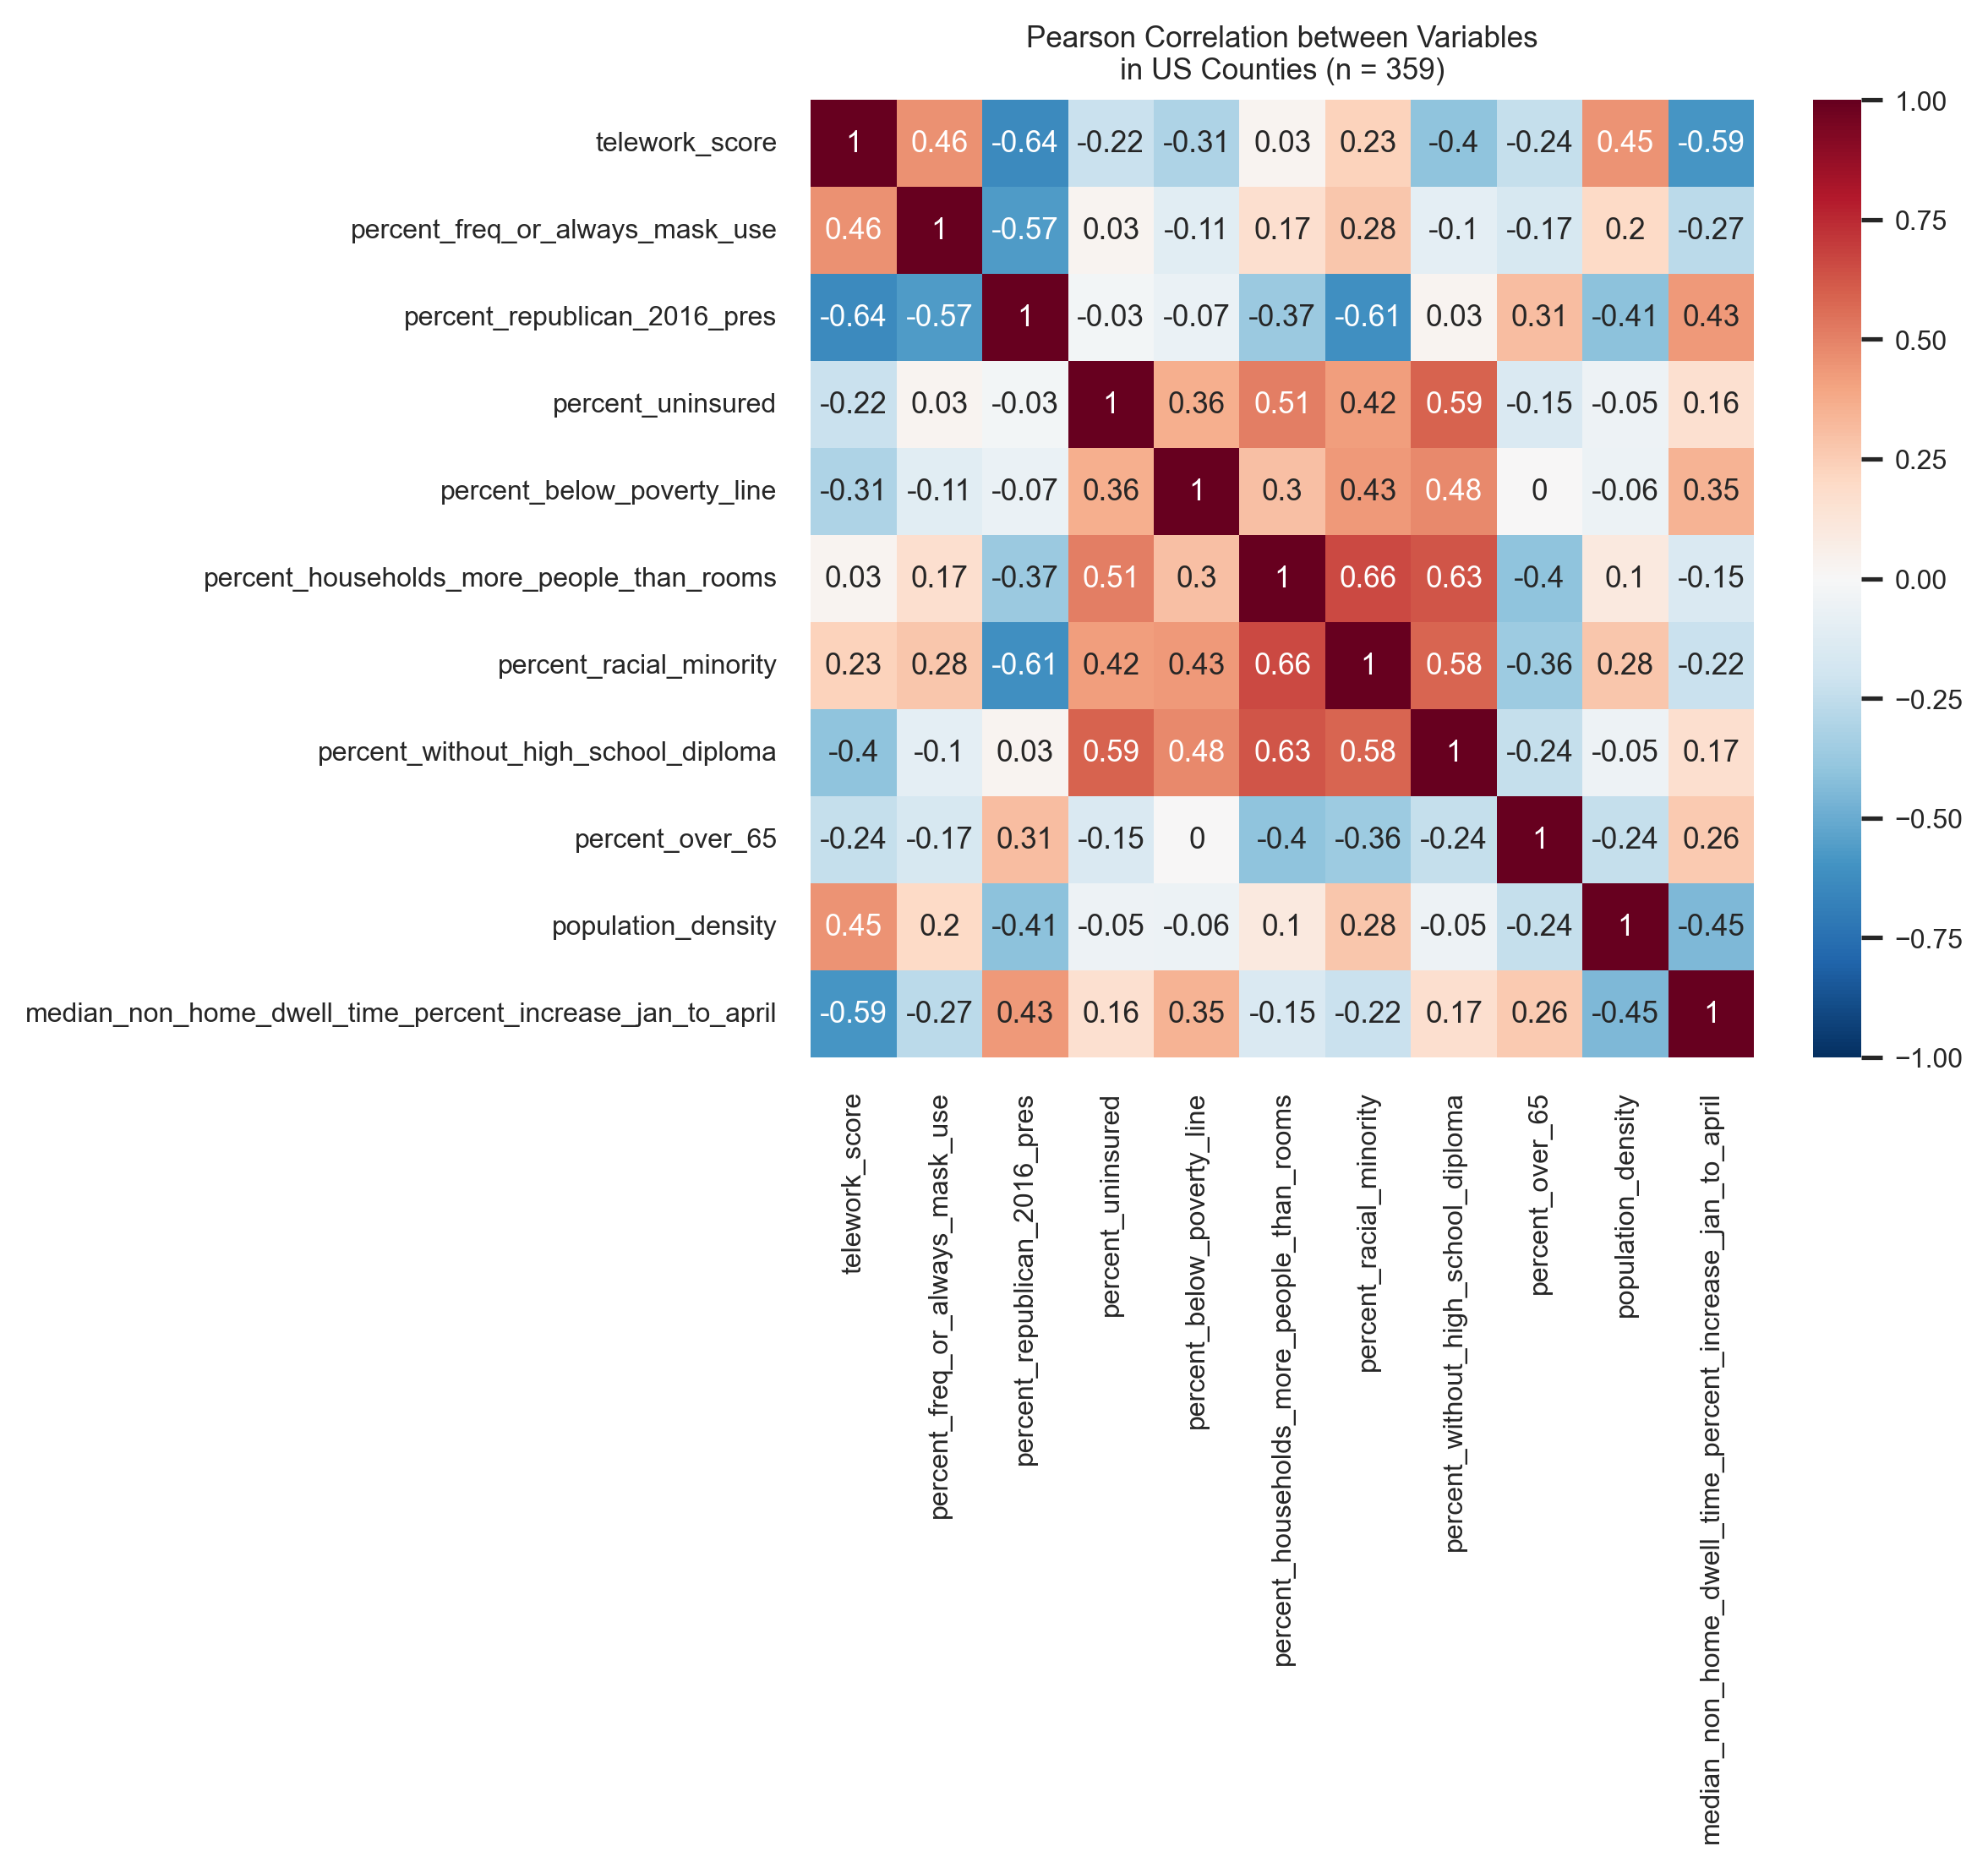

In [53]:
sns.set(font_scale = .7)
plt.title('Pearson Correlation between Variables\nin US Counties (n = {})'.format(len(features.index)))
ax = sns.heatmap(features.corr().round(2), annot = True, cmap = 'RdBu_r', center = 0.0, vmin = -1.0, vmax = 1.0)
plt.savefig('reports/figures/figure_heatmap.png', bbox_inches = 'tight')
plt.show()

In [32]:
def calculate_pvalues(df):
    #https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

calculate_pvalues(features)

,telework_score,percent_freq_or_always_mask_use,percent_republican_2016_pres,percent_uninsured,percent_below_poverty_line,percent_households_more_people_than_rooms,percent_racial_minority,percent_without_high_school_diploma,percent_over_65,population_density,median_non_home_dwell_time_percent_increase_jan_to_april
telework_score,0.0,0.0,0.0,0.000033,0.0,0.597709,0.000008,0.0,0.000004,0.0,0.0
percent_freq_or_always_mask_use,0.0,0.0,0.0,0.566859,0.029912,0.001003,0.0,0.054401,0.001189,0.000109,0.0
percent_republican_2016_pres,0.0,0.0,0.0,0.572641,0.164257,0.0,0.0,0.6364,0.0,0.0,0.0
percent_uninsured,0.000033,0.566859,0.572641,0.0,0.0,0.0,0.0,0.0,0.004443,0.391991,0.002656
percent_below_poverty_line,0.0,0.029912,0.164257,0.0,0.0,0.0,0.0,0.0,0.977179,0.254806,0.0
percent_households_more_people_than_rooms,0.597709,0.001003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053234,0.003302
percent_racial_minority,0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000021
percent_without_high_school_diploma,0.0,0.054401,0.6364,0.0,0.0,0.0,0.0,0.0,0.000004,0.388775,0.00148
percent_over_65,0.000004,0.001189,0.0,0.004443,0.977179,0.0,0.0,0.000004,0.0,0.000003,0.000001
population_density,0.0,0.000109,0.0,0.391991,0.254806,0.053234,0.0,0.388775,0.000003,0.0,0.0


As expected, there's a strong coerrelation between many of our variables since location and socioeconomic situation affects people's lives. Large urban centers have more jobs in corporate offices that could theoretically be performed from home. People without high school diplomas are less likely to have one of those corporate jobs. 

Let's also use variance inflation factor (VIF) to understand the multicollinearity within the dataset. The higher the VIF, the more likely it is that the variable can be represented as a linear combination of the other variables.

In [30]:
vif = pd.DataFrame()
vif['features'] = feature_names
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif

,features,VIF_factor
0,telework_score,72.689536
1,percent_freq_or_always_mask_use,70.620729
2,percent_republican_2016_pres,32.298539
3,percent_uninsured,11.605909
4,percent_below_poverty_line,16.769233
5,percent_households_more_people_than_rooms,5.711610
6,percent_racial_minority,10.220597
7,percent_without_high_school_diploma,25.493549
8,percent_over_65,23.485461
9,population_density,1.565104


Several of our variables have a VIF above 10, indicating high correlation. We can now either drop variables from our dataset until the VIF is lower or leave the variables as is and select a model later that is especially robust to multicollinearity. 

To aid in our model selection, we'll also need to understand the distribution of each of the features.

In [33]:
features.describe()

,telework_score,percent_freq_or_always_mask_use,percent_republican_2016_pres,percent_uninsured,percent_below_poverty_line,percent_households_more_people_than_rooms,percent_racial_minority,percent_without_high_school_diploma,percent_over_65,population_density,median_non_home_dwell_time_percent_increase_jan_to_april
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.293378,0.822287,0.560355,6.710585,14.364903,2.366017,21.823955,11.533148,18.925627,302.304161,-509.365787
std,0.044661,0.105286,0.150149,2.785718,4.728937,2.102224,19.339804,4.773980,4.430167,1017.707509,899.270638
min,0.201309,0.439000,0.040875,2.300000,5.000000,0.100000,2.600000,2.200000,8.700000,0.215951,-8240.451389
25%,0.263135,0.761000,0.469963,4.900000,11.350000,1.100000,7.800000,8.700000,16.300000,25.378482,-451.895989
50%,0.283575,0.846000,0.578990,6.000000,14.100000,1.600000,14.700000,10.600000,18.500000,65.275766,-278.541667
75%,0.317125,0.906000,0.674044,7.800000,16.350000,2.850000,31.150000,12.900000,20.900000,176.717652,-180.250789
max,0.500327,0.992000,0.843360,20.900000,36.000000,13.700000,91.200000,35.400000,38.500000,11737.239954,62.621359


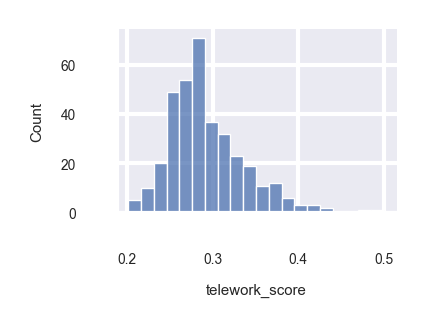

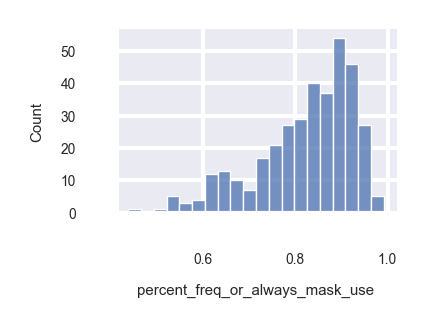

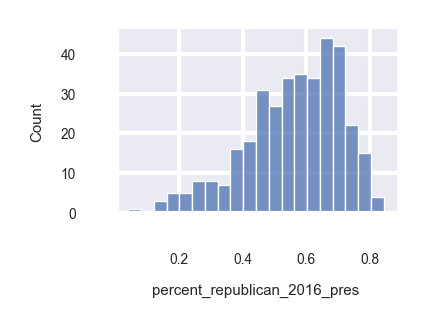

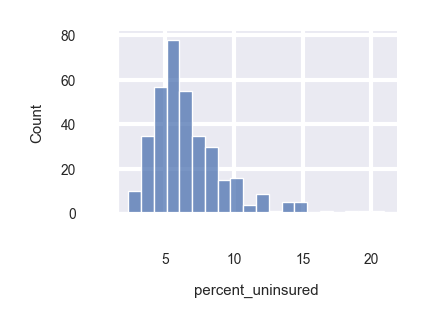

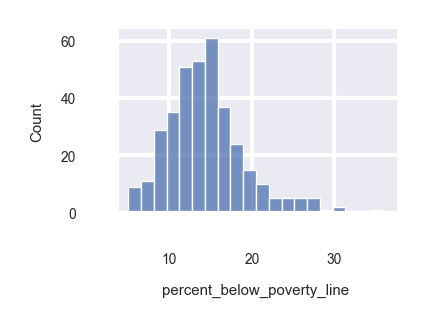

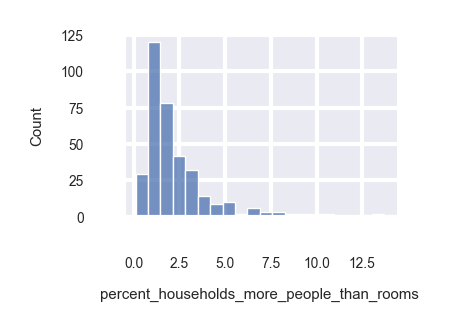

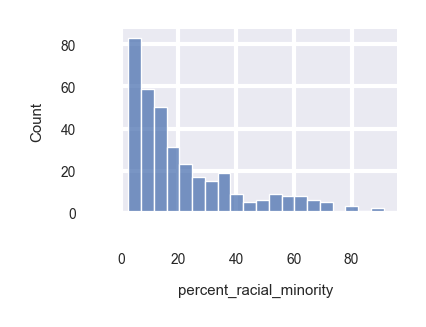

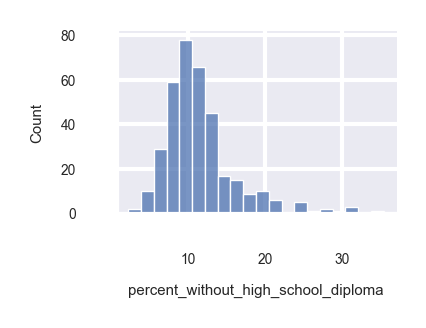

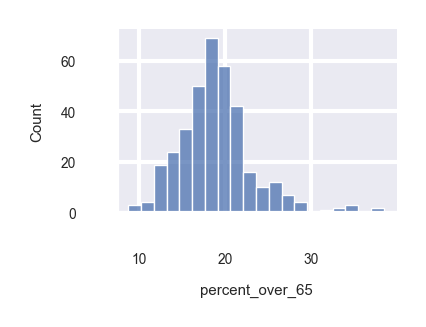

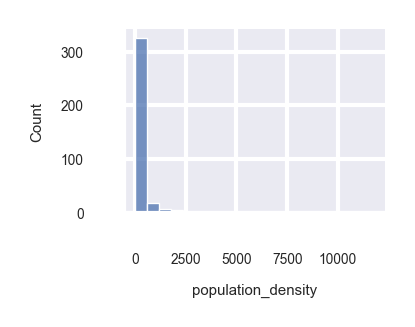

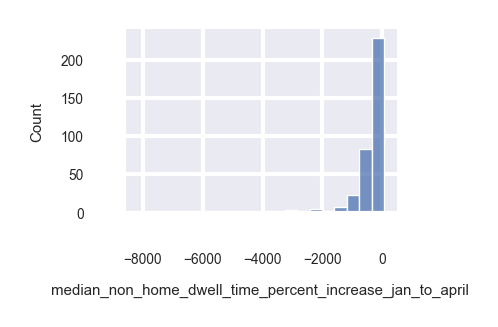

In [35]:
#generate histograms to better understand the feature distributions
sns.set(font_scale = .3)
for col in features.columns:
    sns.displot(features, x=col, bins=20, height=1, aspect=1.33/1)

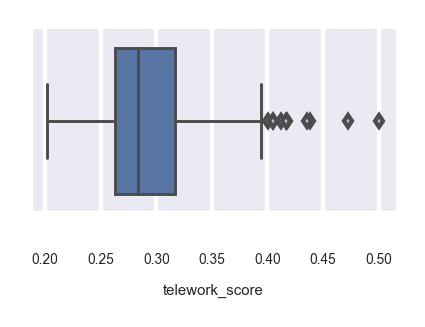

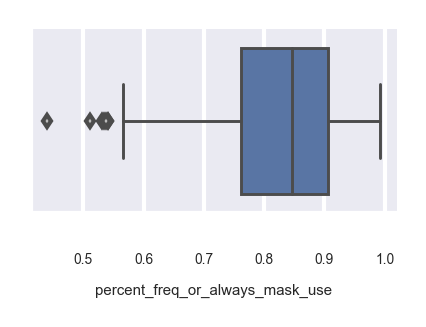

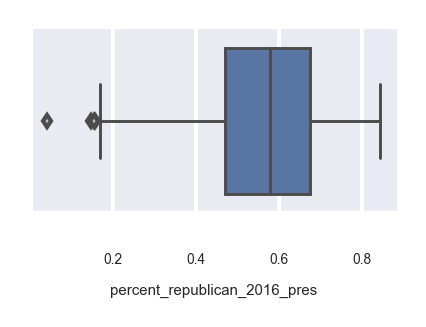

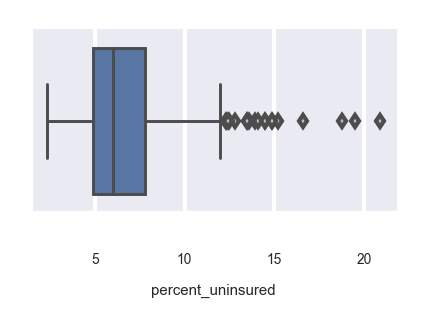

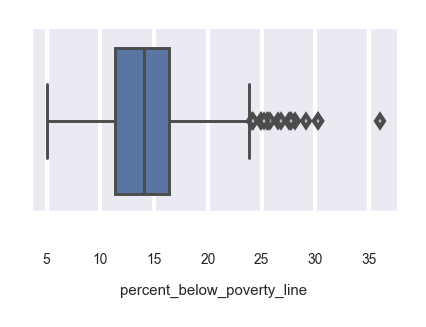

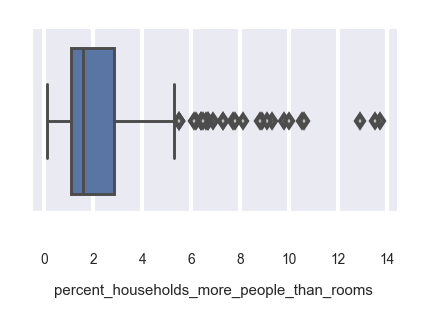

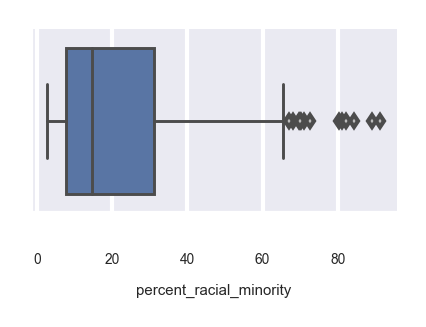

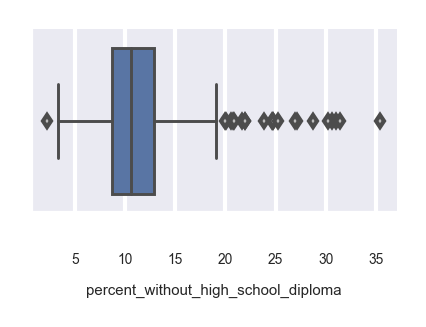

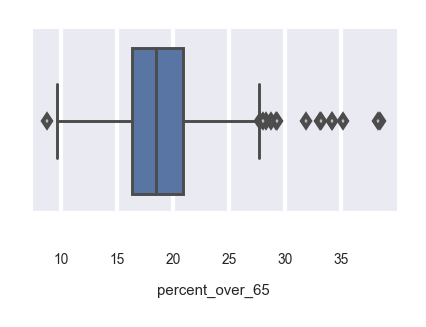

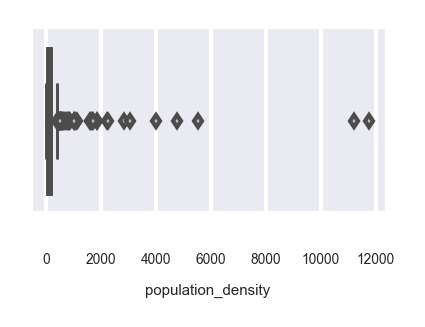

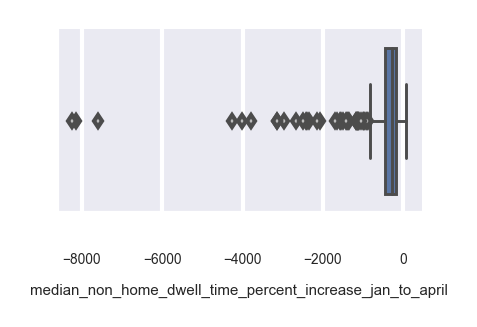

In [49]:
#generate histograms to better understand the feature distributions
sns.set(font_scale = .3)
flierprops = dict(markerfacecolor='0.75', markersize=2, linestyle='none')
for col in features.columns:
    sns.catplot(x = col, data = features, kind = 'box', height=1, aspect=1.33/1, linewidth = .7, flierprops=flierprops)

Many of our distributions are skewed or do not perfectly conform to the normal distribution. We'll have to keep this in mind when selecting our final model.